In [1]:
!pip install nltk

In [2]:
!pip install scikit-learn


In [3]:
!pip install --upgrade pip setuptools wheel


In [4]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Function to load Bangla text from a file
def load_ai_written_text(file_path):
    with open('/content/Jadukor-AI.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-AI.txt'

# Load the text from the file and store it in the 'text' variable
ai_written_text = load_ai_written_text(file_path)

# Print the text to verify
print(ai_written_text)

মেঘলা দুপুর। শ্রাবণ মাসের মৃদু বৃষ্টির ফোঁটাগুলো জানালার কাঁচ বেয়ে গড়িয়ে পড়ছে। ঘরের মধ্যে একটা গুমোট চাপা পরিবেশ। টেবিলের ওপর ছড়িয়ে থাকা বইগুলোর দিকে তাকিয়ে রাকিবের চোখ ভারী হয়ে আসছে। তার পরীক্ষার খাতাটা টেবিলের ওপর উল্টো করে রাখা, যেন চোখের সামনে থাকলেও সেটা থেকে পালানোর চেষ্টা করছে। খাতার ওপর লাল কালির ক্রস চিহ্ন যেন তার বুকের ওপর বিশাল ভারী পাথর হয়ে বসে আছে।
রাকিব এ বছরও অংকে ফেল করেছে। এটা নিয়ে চতুর্থবার। আগেরবার যখন ফেল করেছিল, তখন বাবা-মা তার সাথে কড়া গলায় কথা বলেছিলেন। "তুমি ভালোভাবে পড়াশোনা করো না, এজন্যই এসব হচ্ছে," মা বলেছিলেন রাগে। বাবা নিরবে শুধু কাগজগুলো হাতে নিয়েছিলেন, কিন্তু তার চোখের গভীর দৃষ্টি রাকিবের ভেতরটা কাঁপিয়ে দিয়েছিল।
আজও মা-বাবা বাসায় ফিরবেন। পরীক্ষার ফলাফল তারা এখনো জানেন না, কিন্তু জানবেন যখন জানবেন, তখন কী হবে—এই ভেবে রাকিবের গলা শুকিয়ে আসছে। মনে হচ্ছে যেন শ্বাস নেওয়াও কঠিন হয়ে উঠেছে। সারা দুপুর জুড়ে সে বিছানায় শুয়ে শুয়ে নিজেকে প্রশ্ন করেছে—"আমি কি সত্যিই এতোটা অক্ষম?"
হঠাৎ করেই জানালার বাইরে একটা অদ্ভুত শব্দ হলো। রাকিব জানালার দিকে তাকালো। কুয়াশা ভেদ করে ক

In [6]:
def bangla_sentence_tokenize(ai_written_text):
    # Split sentences by full stop (।) used in Bangla
    sentences = ai_written_text.split('।')
    sentences = ai_written_text.split('\n\n')
    sentences = ai_written_text.split('\n')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

In [7]:
def bangla_word_tokenize(ai_written_text):
    # Split words by spaces
    words = ai_written_text.split()

    # Remove any leading/trailing whitespace and filter out empty strings
    words = [word.strip() for word in words if word.strip()]

    # Print the total number of words
    total_words = len(words)
    print(f"Total number of words: {total_words}")

    return words, total_words  # Also returning the total number of words


In [8]:
def preprocess_text(ai_written_text):
    # Remove punctuation (you might want to keep Bangla-specific punctuation like "।")
    translator = str.maketrans('', '', string.punctuation)
    ai_written_text = ai_written_text.translate(translator)

    # Tokenize sentences using the custom function
    sentences = bangla_sentence_tokenize(ai_written_text)

    # Tokenize words using the custom function
    words, total_words = bangla_word_tokenize(ai_written_text) # Modified to correctly capture the two return values

    return words, total_words, sentences # Added total_words to the return statement


words, total_words, sentences = preprocess_text(ai_written_text)
print(words)
print(total_words)
print(sentences)

Total number of words: 1595
['মেঘলা', 'দুপুর।', 'শ্রাবণ', 'মাসের', 'মৃদু', 'বৃষ্টির', 'ফোঁটাগুলো', 'জানালার', 'কাঁচ', 'বেয়ে', 'গড়িয়ে', 'পড়ছে।', 'ঘরের', 'মধ্যে', 'একটা', 'গুমোট', 'চাপা', 'পরিবেশ।', 'টেবিলের', 'ওপর', 'ছড়িয়ে', 'থাকা', 'বইগুলোর', 'দিকে', 'তাকিয়ে', 'রাকিবের', 'চোখ', 'ভারী', 'হয়ে', 'আসছে।', 'তার', 'পরীক্ষার', 'খাতাটা', 'টেবিলের', 'ওপর', 'উল্টো', 'করে', 'রাখা', 'যেন', 'চোখের', 'সামনে', 'থাকলেও', 'সেটা', 'থেকে', 'পালানোর', 'চেষ্টা', 'করছে।', 'খাতার', 'ওপর', 'লাল', 'কালির', 'ক্রস', 'চিহ্ন', 'যেন', 'তার', 'বুকের', 'ওপর', 'বিশাল', 'ভারী', 'পাথর', 'হয়ে', 'বসে', 'আছে।', 'রাকিব', 'এ', 'বছরও', 'অংকে', 'ফেল', 'করেছে।', 'এটা', 'নিয়ে', 'চতুর্থবার।', 'আগেরবার', 'যখন', 'ফেল', 'করেছিল', 'তখন', 'বাবামা', 'তার', 'সাথে', 'কড়া', 'গলায়', 'কথা', 'বলেছিলেন।', 'তুমি', 'ভালোভাবে', 'পড়াশোনা', 'করো', 'না', 'এজন্যই', 'এসব', 'হচ্ছে', 'মা', 'বলেছিলেন', 'রাগে।', 'বাবা', 'নিরবে', 'শুধু', 'কাগজগুলো', 'হাতে', 'নিয়েছিলেন', 'কিন্তু', 'তার', 'চোখের', 'গভীর', 'দৃষ্টি', 'রাকিবের', 'ভেতরটা', 'কাঁপিয়ে', 'দিয়েছিল।'

In [9]:
# Function to load Bangla text from a file
def load_ai_written_text(file_path):
    with open('/content/Jadukor-AI.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-AI.txt'

# Load the text from the file and store it in the 'text' variable
ai_written_text = load_ai_written_text(file_path)

# Print the text to verify
print(ai_written_text)

মেঘলা দুপুর। শ্রাবণ মাসের মৃদু বৃষ্টির ফোঁটাগুলো জানালার কাঁচ বেয়ে গড়িয়ে পড়ছে। ঘরের মধ্যে একটা গুমোট চাপা পরিবেশ। টেবিলের ওপর ছড়িয়ে থাকা বইগুলোর দিকে তাকিয়ে রাকিবের চোখ ভারী হয়ে আসছে। তার পরীক্ষার খাতাটা টেবিলের ওপর উল্টো করে রাখা, যেন চোখের সামনে থাকলেও সেটা থেকে পালানোর চেষ্টা করছে। খাতার ওপর লাল কালির ক্রস চিহ্ন যেন তার বুকের ওপর বিশাল ভারী পাথর হয়ে বসে আছে।
রাকিব এ বছরও অংকে ফেল করেছে। এটা নিয়ে চতুর্থবার। আগেরবার যখন ফেল করেছিল, তখন বাবা-মা তার সাথে কড়া গলায় কথা বলেছিলেন। "তুমি ভালোভাবে পড়াশোনা করো না, এজন্যই এসব হচ্ছে," মা বলেছিলেন রাগে। বাবা নিরবে শুধু কাগজগুলো হাতে নিয়েছিলেন, কিন্তু তার চোখের গভীর দৃষ্টি রাকিবের ভেতরটা কাঁপিয়ে দিয়েছিল।
আজও মা-বাবা বাসায় ফিরবেন। পরীক্ষার ফলাফল তারা এখনো জানেন না, কিন্তু জানবেন যখন জানবেন, তখন কী হবে—এই ভেবে রাকিবের গলা শুকিয়ে আসছে। মনে হচ্ছে যেন শ্বাস নেওয়াও কঠিন হয়ে উঠেছে। সারা দুপুর জুড়ে সে বিছানায় শুয়ে শুয়ে নিজেকে প্রশ্ন করেছে—"আমি কি সত্যিই এতোটা অক্ষম?"
হঠাৎ করেই জানালার বাইরে একটা অদ্ভুত শব্দ হলো। রাকিব জানালার দিকে তাকালো। কুয়াশা ভেদ করে ক

In [10]:
!pip install BnLemma

In [11]:
import BnLemma as lm
import string

# Define a list of Bangla stop words (you can extend this list as needed)
bangla_stop_words = ['এ', 'ও', 'আছে', 'থেকে', 'কিন্তু', 'যা', 'যে', 'এবং', 'এই', 'ওই', 'হয়', 'সে', 'আমি', 'আমরা', 'তুমি', 'তারা']

# Function to tokenize and lemmatize Bangla sentences
def bangla_sentence_tokenize(ai_written_text):
    # Initialize the BnLemma lemmatizer
    bl = lm.Lemmatizer()

    # Split sentences by full stop (।) and newline characters
    sentences = ai_written_text.split('।')
    sentences = [sentence for sublist in [s.split('\n\n') for s in sentences] for sentence in sublist]
    sentences = [sentence for sublist in [s.split('\n') for s in sentences] for sentence in sublist]

    # Strip and filter empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Lemmatize each sentence, avoiding empty or problematic sentences
    lemmatized_sentences = []
    for sentence in sentences:
        if sentence:  # Ensure sentence is not empty
            try:
                lemmatized_sentence = bl.lemma(sentence)
                lemmatized_sentences.append(lemmatized_sentence)
            except KeyError as e:
                print(f"Error lemmatizing sentence: {sentence}, skipping. Error: {e}")

    # Return the list of lemmatized sentences
    return lemmatized_sentences

# Function to remove stop words and count words
def remove_stop_words(sentences):
    # Lists to hold sentences after stop word removal
    cleaned_sentences = []

    # Initialize counters
    total_words = 0
    remaining_words = 0
    total_removed_words = 0

    # Total number of sentences
    total_sentences = len(sentences)

    # Iterate over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = sentence.split()

        # Count the total number of words
        total_words += len(words)

        # Remove stop words from the sentence
        filtered_words = [word for word in words if word not in bangla_stop_words]

        # Count the number of removed stop words
        removed_words_count = len(words) - len(filtered_words)
        total_removed_words += removed_words_count

        # Count the number of remaining words after removing stop words
        remaining_words += len(filtered_words)

        # Join the words back into a cleaned sentence
        cleaned_sentence = ' '.join(filtered_words)

        # Add the cleaned sentence to the list
        cleaned_sentences.append(cleaned_sentence)

    # Print the cleaned sentences
    print("Cleaned Sentences:", cleaned_sentences)

    # Print total and remaining word counts
    print(f"Total words: {total_words}")
    print(f"Remaining words after stop word removal: {remaining_words}")
    print(f"Total stop words removed: {total_removed_words}")
    print(f"Total sentences: {total_sentences}")

    return cleaned_sentences

# Preprocessing function to remove punctuation and lemmatize
def preprocess_text(ai_written_text):
    # Remove punctuation (you might want to adjust for Bangla-specific punctuation)
    translator = str.maketrans('', '', string.punctuation)
    ai_written_text = ai_written_text.translate(translator)

    # Tokenize and lemmatize sentences using the custom function
    sentences = bangla_sentence_tokenize(ai_written_text)

    return sentences


# Preprocess the text
sentences = preprocess_text(ai_written_text)
# Remove stop words from the sentences and print results
cleaned_sentences = remove_stop_words(sentences)


Cleaned Sentences: ['মেঘ দুপুর', 'রাবণ মাস মৃদু বৃষ্টি ফোঁটা জানাজা কাঁচ বেয়ে গড় পড়া', 'ঘর মধ্যে একটি মোট চাপা পরিবেশ', 'টেবিল ওপর ছড়ি থাকা গুলো দিক তাকানো রাকিবুল চোখ ভারী হওয়া আসা', 'তার পরীক্ষা খাতা টেবিল ওপর উল্টো করা রাখা চোখ সামনে থাক সেট পালা চেষ্টা করা', 'খাতা ওপর লাল কালির রস চিহ্ন তার বুক ওপর বিশাল ভারী পাথর হওয়া আছ', 'রাকিবুল বছর কে ফেল করা', 'এটি নেওয়া চতুর্থ', 'আগের যখন ফেল করা তখন বাবামা তার সাথে কড়া গলা কথা বলেছিলেন', 'আপনি ভালো পড়াশোনা করো না জন্য এস হওয়া মা বলেছিলেন রাগ', 'বাবা নিরব শুধু কাগজ হাত নিয়েছিলেন তার চোখ গভীর দৃষ্টি রাকিবুল ভেতরটা কাঁপ দেওয়া', 'আজ মাবাবা বাসা ফির', 'পরীক্ষা ফলাফল এখন জানা না জানাজা যখন জানাজা তখন কী হবে—এই ভেবে রাকিবুল গলা শুক আসা', 'মন হওয়া শ্বাস নেওয়া কঠিন হওয়া উঠেছে', 'সারা দুপুর জুড়ে বিছানা শুয়ে শুয়ে নিজ প্রশ্ন করেছে—আমি কি সত্য এতো অক্ষম', 'হঠ করেই জানাজা বাই একটি অদ্ভূত শব্দ হওয়া', 'রাকিবুল জানাজা দিক তাকালো', 'কুয়াশা ভেদ করা কোনো এক চেনা আকৃতি তার দিক আসা', 'প্রথম কিছু বুঝ পা না ধীর ধীর তার চোখ সামনে স্পষ্ট হল ছোট আকারের প্রাণ কিছু মান

In [12]:
from itertools import combinations

# Function to create word pairs from a cleaned sentence
def create_word_pairs(cleaned_sentences):
    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words

        # Generate pairs of words
        word_pairs = list(combinations(words, 2))  # Create pairs using combinations

        # Print the pairs and the count of pairs
        print(f"Sentence: '{sentence}'")
        print(f"Word Pairs: {word_pairs}")
        print(f"Number of pairs: {len(word_pairs)}\n")


create_word_pairs(cleaned_sentences)


Sentence: 'মেঘ দুপুর'
Word Pairs: [('মেঘ', 'দুপুর')]
Number of pairs: 1

Sentence: 'রাবণ মাস মৃদু বৃষ্টি ফোঁটা জানাজা কাঁচ বেয়ে গড় পড়া'
Word Pairs: [('রাবণ', 'মাস'), ('রাবণ', 'মৃদু'), ('রাবণ', 'বৃষ্টি'), ('রাবণ', 'ফোঁটা'), ('রাবণ', 'জানাজা'), ('রাবণ', 'কাঁচ'), ('রাবণ', 'বেয়ে'), ('রাবণ', 'গড়'), ('রাবণ', 'পড়া'), ('মাস', 'মৃদু'), ('মাস', 'বৃষ্টি'), ('মাস', 'ফোঁটা'), ('মাস', 'জানাজা'), ('মাস', 'কাঁচ'), ('মাস', 'বেয়ে'), ('মাস', 'গড়'), ('মাস', 'পড়া'), ('মৃদু', 'বৃষ্টি'), ('মৃদু', 'ফোঁটা'), ('মৃদু', 'জানাজা'), ('মৃদু', 'কাঁচ'), ('মৃদু', 'বেয়ে'), ('মৃদু', 'গড়'), ('মৃদু', 'পড়া'), ('বৃষ্টি', 'ফোঁটা'), ('বৃষ্টি', 'জানাজা'), ('বৃষ্টি', 'কাঁচ'), ('বৃষ্টি', 'বেয়ে'), ('বৃষ্টি', 'গড়'), ('বৃষ্টি', 'পড়া'), ('ফোঁটা', 'জানাজা'), ('ফোঁটা', 'কাঁচ'), ('ফোঁটা', 'বেয়ে'), ('ফোঁটা', 'গড়'), ('ফোঁটা', 'পড়া'), ('জানাজা', 'কাঁচ'), ('জানাজা', 'বেয়ে'), ('জানাজা', 'গড়'), ('জানাজা', 'পড়া'), ('কাঁচ', 'বেয়ে'), ('কাঁচ', 'গড়'), ('কাঁচ', 'পড়া'), ('বেয়ে', 'গড়'), ('বেয়ে', 'পড়া'), ('গড়', 'পড়া')]
Number of pairs: 45

Sentence: '

In [13]:
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    # Print the frequency of each pair if frequency > 1
    print("Pairs with Frequency > 1:")
    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only print if frequency is greater than 1
            print(f"Pair: {pair}, Frequency: {frequency}")

check_pair_frequency(cleaned_sentences)  # Call the function



Pairs with Frequency > 1:
Pair: ('বৃষ্টি', 'পড়া'), Frequency: 2
Pair: ('টেবিল', 'ওপর'), Frequency: 3
Pair: ('টেবিল', 'চোখ'), Frequency: 2
Pair: ('ওপর', 'চোখ'), Frequency: 2
Pair: ('ওপর', 'ভারী'), Frequency: 3
Pair: ('ওপর', 'হওয়া'), Frequency: 4
Pair: ('ওপর', 'আসা'), Frequency: 4
Pair: ('গুলো', 'রাকিবুল'), Frequency: 3
Pair: ('গুলো', 'হওয়া'), Frequency: 2
Pair: ('দিক', 'তাকানো'), Frequency: 6
Pair: ('দিক', 'হওয়া'), Frequency: 2
Pair: ('দিক', 'আসা'), Frequency: 2
Pair: ('তাকানো', 'রাকিবুল'), Frequency: 2
Pair: ('তাকানো', 'হওয়া'), Frequency: 2
Pair: ('রাকিবুল', 'চোখ'), Frequency: 5
Pair: ('রাকিবুল', 'হওয়া'), Frequency: 10
Pair: ('রাকিবুল', 'আসা'), Frequency: 5
Pair: ('চোখ', 'হওয়া'), Frequency: 2
Pair: ('ভারী', 'হওয়া'), Frequency: 3
Pair: ('হওয়া', 'আসা'), Frequency: 2
Pair: ('তার', 'পরীক্ষা'), Frequency: 3
Pair: ('তার', 'খাতা'), Frequency: 2
Pair: ('তার', 'ওপর'), Frequency: 3
Pair: ('তার', 'করা'), Frequency: 8
Pair: ('তার', 'চোখ'), Frequency: 5
Pair: ('তার', 'সামনে'), Frequency: 2
Pair: ('

In [14]:
pip install networkx matplotlib


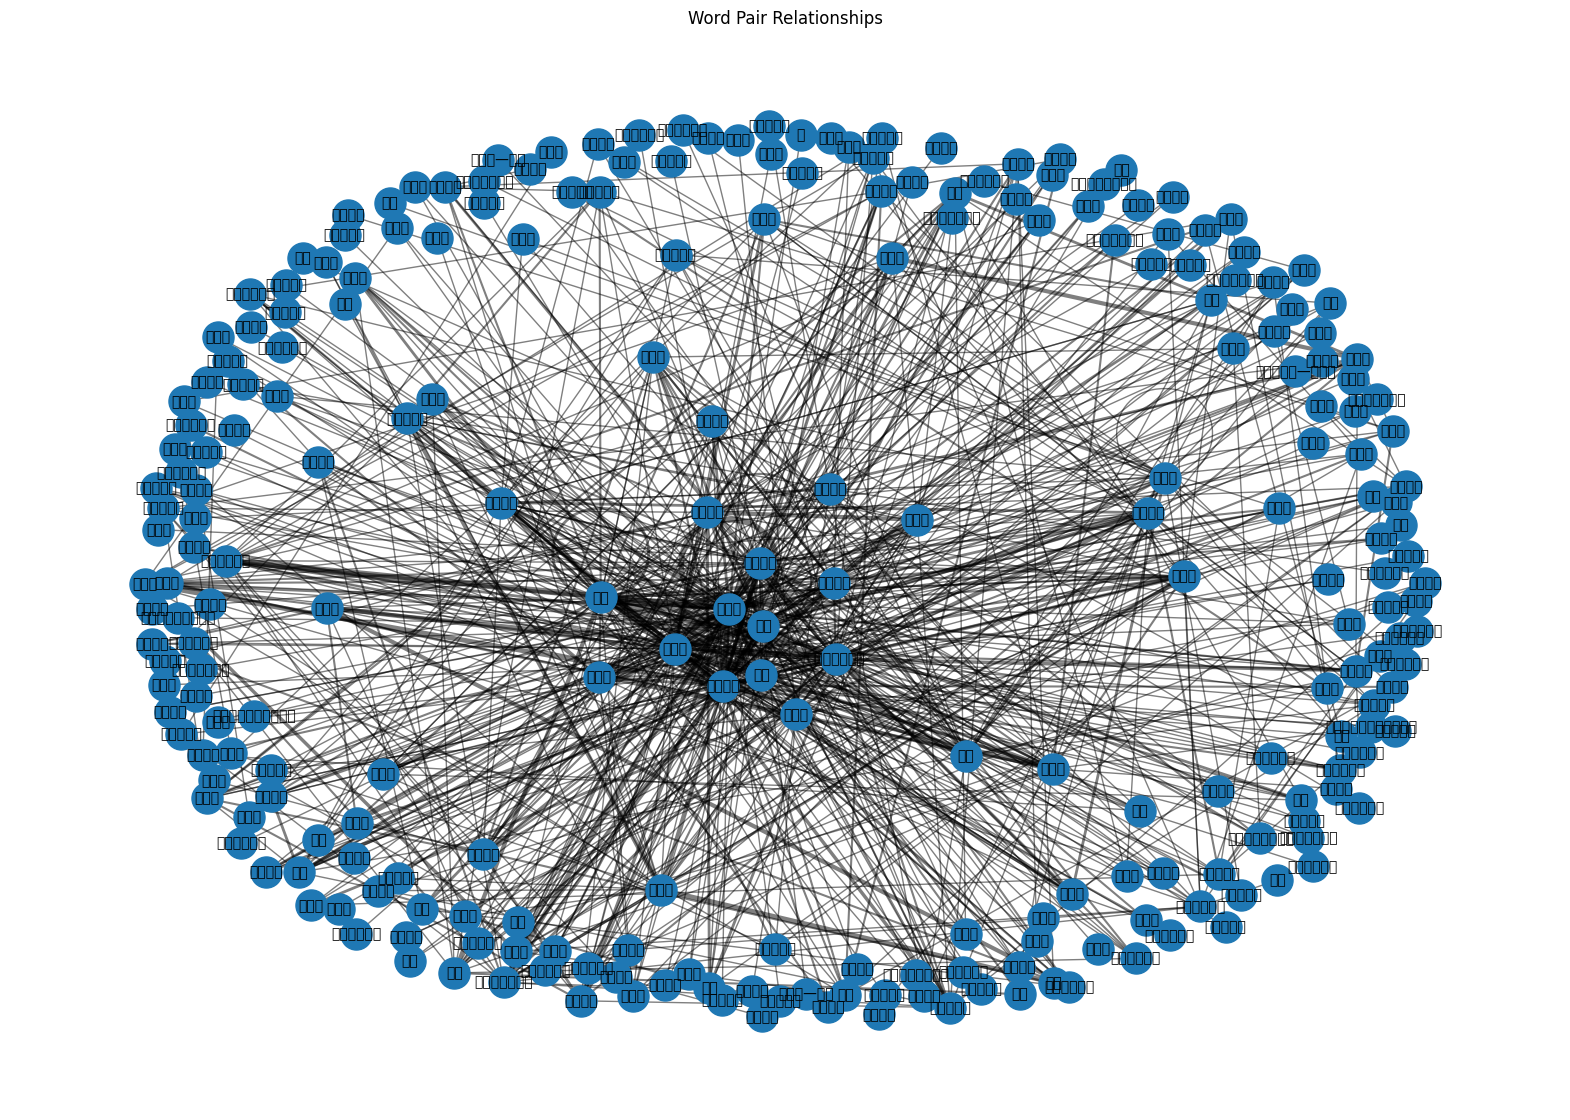

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    return pair_frequency  # Return the pair frequency dictionary

def plot_word_pairs(pair_frequency):
    G = nx.Graph()  # Create a new graph

    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only consider pairs with frequency greater than 1
            G.add_edge(pair[0], pair[1], weight=frequency)  # Add edge with weight

    # Generate positions for the nodes using a layout that separates them more
    pos = nx.spring_layout(G, k=2)  # Increase 'k' for more spacing

    weights = nx.get_edge_attributes(G, 'weight').values()  # Get edge weights

    plt.figure(figsize=(20, 14))
    nx.draw_networkx_nodes(G, pos, node_size=500)  # Draw nodes with larger size
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)  # Draw edges with adjusted thickness
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')  # Draw labels with increased size

    plt.title('Word Pair Relationships')
    plt.axis('off')  # Turn off the axis
    plt.show()  # Display the graph


pair_frequency = check_pair_frequency(cleaned_sentences)  # Get the frequency of pairs
plot_word_pairs(pair_frequency)  # Plot the word pairs


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned sentences
tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)

# Create a DataFrame to view the results
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)


      অক   অত   অদ   অধ        অন   অব  অবশ   অভ   অর   অস  ...       হওয়  \
0    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.335525   
4    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
..   ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...       ...   
160  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
161  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.308817   
162  0.0  0.0  0.0  0.0  0.441473  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
163  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
164  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

      হচ   হঠ   হত   হব   হল   হস   হয়   য়গ   য়ম  
0    0.0  0.0  0.0  0.0 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd



# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned sentences
tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)

# Create a DataFrame to view the results
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print the DataFrame to the console
print(tfidf_df)

# Save the TF-IDF DataFrame to a text file
with open('tfidf_ai_results.txt', 'w', encoding='utf-8') as f:
    # Write the header
    f.write(', '.join(tfidf_df.columns) + '\n')

    # Write each row of the DataFrame
    for index, row in tfidf_df.iterrows():
        f.write(', '.join(map(str, row.values)) + '\n')

print("TF-IDF results have been saved to 'tfidf_ai_results.txt'")


      অক   অত   অদ   অধ        অন   অব  অবশ   অভ   অর   অস  ...       হওয়  \
0    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.335525   
4    0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
..   ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...       ...   
160  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
161  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.308817   
162  0.0  0.0  0.0  0.0  0.441473  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
163  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
164  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

      হচ   হঠ   হত   হব   হল   হস   হয়   য়গ   য়ম  
0    0.0  0.0  0.0  0.0 